In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
pd.set_option('display.max_columns', None)

In [2]:
raw_path = Path('../data/raw')
interim_path = Path('../data/interim')

In [3]:
df = pd.read_csv(interim_path / 'properties_missing_imputed.csv')

In [4]:
df.shape

(5812, 19)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,gurukul,2.40,11111.0,3.0,3.0,3,3.0,North,Relatively New,2160.0,0.0,0.0,1.0,1.0,0.0,0.0,86.0
1,house,omkar bunglows,thaltej,4.75,15079.0,4.0,4.0,1,2.0,East,Old Property,3150.0,0.0,0.0,1.0,1.0,0.0,1.0,161.0
2,flat,sheeva amardeep enclave,nava naroda,0.27,2400.0,2.0,2.0,1,3.0,NaN,Moderately Old,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,flat,arizona river heights,usmanpura,2.10,8910.0,3.0,3.0,2,11.0,East,Moderately Old,1814.0,0.0,0.0,0.0,1.0,1.0,1.0,54.0
4,flat,avirat silver harmony,gota,0.98,4840.0,3.0,3.0,1,9.0,East,Moderately Old,1680.0,0.0,0.0,1.0,0.0,0.0,0.0,75.0


In [6]:
train_df = df.drop(columns=['society','price_per_sqft','facing'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,gurukul,2.40,3.0,3.0,3,3.0,Relatively New,2160.0,0.0,0.0,1.0,1.0,0.0,0.0,86.0
1,house,thaltej,4.75,4.0,4.0,1,2.0,Old Property,3150.0,0.0,0.0,1.0,1.0,0.0,1.0,161.0
2,flat,nava naroda,0.27,2.0,2.0,1,3.0,Moderately Old,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,flat,usmanpura,2.10,3.0,3.0,2,11.0,Moderately Old,1814.0,0.0,0.0,0.0,1.0,1.0,1.0,54.0
4,flat,gota,0.98,3.0,3.0,1,9.0,Moderately Old,1680.0,0.0,0.0,1.0,0.0,0.0,0.0,75.0


### luxury score

<Axes: >

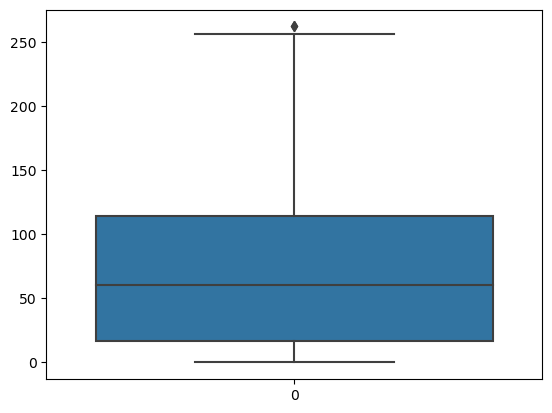

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if score == 0:
        return "Not available"
    elif 1 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    else :
        return "High"

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df['luxury_score'].describe()

count    5812.000000
mean       73.825361
std        65.826801
min         0.000000
25%        17.000000
50%        60.500000
75%       114.000000
max       262.000000
Name: luxury_score, dtype: float64

In [12]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,house,gurukul,2.40,3.0,3.0,3,3.0,Relatively New,2160.0,0.0,0.0,1.0,1.0,0.0,0.0,86.0,Medium
1,house,thaltej,4.75,4.0,4.0,1,2.0,Old Property,3150.0,0.0,0.0,1.0,1.0,0.0,1.0,161.0,High
2,flat,nava naroda,0.27,2.0,2.0,1,3.0,Moderately Old,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not available
3,flat,usmanpura,2.10,3.0,3.0,2,11.0,Moderately Old,1814.0,0.0,0.0,0.0,1.0,1.0,1.0,54.0,Medium
4,flat,gota,0.98,3.0,3.0,1,9.0,Moderately Old,1680.0,0.0,0.0,1.0,0.0,0.0,0.0,75.0,Medium


### floorNum

In [13]:
train_df['luxury_category'].isnull().sum()

0

<Axes: >

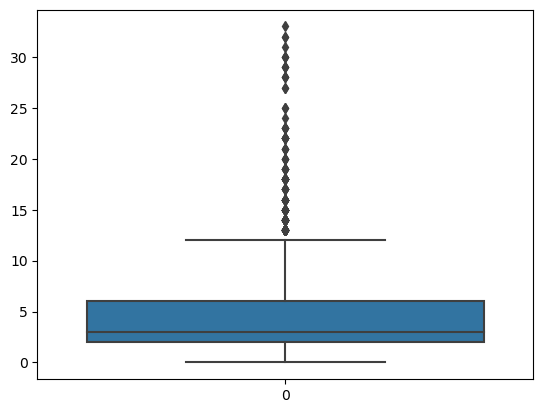

In [14]:
sns.boxplot(df['floorNum'])

In [15]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [16]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,house,gurukul,2.40,3.0,3.0,3,3.0,Relatively New,2160.0,0.0,0.0,1.0,1.0,0.0,0.0,86.0,Medium,Mid Floor
1,house,thaltej,4.75,4.0,4.0,1,2.0,Old Property,3150.0,0.0,0.0,1.0,1.0,0.0,1.0,161.0,High,Low Floor
2,flat,nava naroda,0.27,2.0,2.0,1,3.0,Moderately Old,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not available,Mid Floor
3,flat,usmanpura,2.10,3.0,3.0,2,11.0,Moderately Old,1814.0,0.0,0.0,0.0,1.0,1.0,1.0,54.0,Medium,High Floor
4,flat,gota,0.98,3.0,3.0,1,9.0,Moderately Old,1680.0,0.0,0.0,1.0,0.0,0.0,0.0,75.0,Medium,Mid Floor


In [18]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [21]:
temp = train_df.drop(columns=['servant room', 'study room', 'others'])
temp['furnishing_type'] = temp['furnishing_type'].replace({0.0:'unfurnished',1.0:'semifurnished',2.0:'furnished'})
temp.to_csv(interim_path / 'properties_post_feature_selection_v2.csv',index=False)

In [22]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,gurukul,2.40,3.0,3.0,3,Relatively New,2160.0,0.0,0.0,1.0,1.0,0.0,0.0,Medium,Mid Floor
1,house,thaltej,4.75,4.0,4.0,1,Old Property,3150.0,0.0,0.0,1.0,1.0,0.0,1.0,High,Low Floor
2,flat,nava naroda,0.27,2.0,2.0,1,Moderately Old,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,Not available,Mid Floor
3,flat,usmanpura,2.10,3.0,3.0,2,Moderately Old,1814.0,0.0,0.0,0.0,1.0,1.0,1.0,Medium,High Floor
4,flat,gota,0.98,3.0,3.0,1,Moderately Old,1680.0,0.0,0.0,1.0,0.0,0.0,0.0,Medium,Mid Floor


In [23]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['bapunagar', 'bhadaj', 'bodakdev', 'chandkheda', 'chandlodia',
       'charodi', 'ctm', 'ghatlodia', 'ghuma', 'gota', 'gurukul',
       'isanpur', 'jagatpur', 'jodhpur', 'khokhara', 'koteshwar',
       'krishna nagar', 'maninagar', 'memnagar', 'motera', 'nana chiloda',
       'naranpura', 'naroda', 'narol', 'nava naroda', 'navrangpura',
       'new maninagar', 'new ranip', 'nikol', 'odhav', 'paldi',
       'prahlad nagar', 'sarkhej', 'satellite', 'science city',
       'sg highway', 'shahibaug', 'shela', 'shilaj', 'sola',
       'south bopal', 'thaltej', 'usmanpura', 'vaishnodevi circle',
       'vasna', 'vastral', 'vastrapur', 'vatva'], dtype=object)]
[array(['0', '1', '2', '3', '3+'], dtype=object)]
[array(['Moderately Old', 'New Property', 'Old Property', 'Relatively New',
       'Under Construction'], dtype=object)]
[array(['High', 'Low', 'Medium', 'Not available'], dtype=object)]
[array(['High Floor', 'Low Floor', 'Mid Floor'], dtyp

In [24]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,10.0,3.0,3.0,3.0,3.0,2160.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0
1,1.0,41.0,4.0,4.0,1.0,2.0,3150.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
2,0.0,24.0,2.0,2.0,1.0,0.0,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
3,0.0,42.0,3.0,3.0,2.0,0.0,1814.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0
4,0.0,9.0,3.0,3.0,1.0,0.0,1680.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,0.0,9.0,2.0,2.0,2.0,3.0,978.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5808,1.0,14.0,9.0,6.0,3.0,2.0,2100.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
5809,1.0,11.0,1.0,1.0,1.0,2.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
5810,0.0,9.0,2.0,2.0,1.0,3.0,1215.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0


In [25]:
y_label

0       2.40
1       4.75
2       0.27
3       2.10
4       0.98
        ... 
5807    0.75
5808    1.60
5809    0.60
5810    0.58
5811    2.75
Name: price, Length: 5812, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

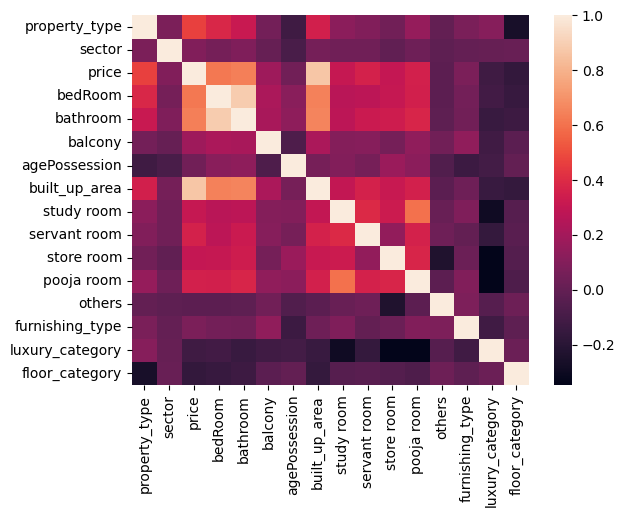

In [26]:
 sns.heatmap(data_label_encoded.corr())

In [27]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,0.092686
1,price,1.000000
2,bedRoom,0.620054
3,bathroom,0.641855
4,balcony,0.181610
5,agePossession,0.042633
6,built_up_area,0.865377
7,study room,0.306652
8,servant room,0.359809
9,store room,0.303132


### Technique 2 - Random Forest Feature Importance

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.788147
1,sector,0.042323
0,property_type,0.036725
3,bathroom,0.033833
2,bedRoom,0.031165
5,agePossession,0.012689
4,balcony,0.011052
12,furnishing_type,0.009767
13,luxury_category,0.009048
14,floor_category,0.006322


### Technique 3 - Gradient Boosting Feature importances

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.798912
3,bathroom,0.073345
0,property_type,0.042428
2,bedRoom,0.032967
1,sector,0.026699
5,agePossession,0.008833
13,luxury_category,0.004520
9,store room,0.003054
12,furnishing_type,0.002527
4,balcony,0.002317


### Technique 4 - Permutation Importance

In [30]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.845211
0,property_type,0.104136
3,bathroom,0.078149
1,sector,0.025609
2,bedRoom,0.023802
8,servant room,0.004723
14,floor_category,0.004568
4,balcony,0.003499
9,store room,0.003004
12,furnishing_type,0.002955


### Technique 5 - LASSO

In [31]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.352741
0,property_type,0.324728
3,bathroom,0.169194
8,servant room,0.078375
12,furnishing_type,0.053324
1,sector,0.045817
9,store room,0.043925
7,study room,0.037009
14,floor_category,0.001047
5,agePossession,0.000858


### Technique 6 - RFE

In [32]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.790276
1,sector,0.041925
0,property_type,0.037047
3,bathroom,0.035392
2,bedRoom,0.025973
4,balcony,0.012239
5,agePossession,0.012216
12,furnishing_type,0.010150
13,luxury_category,0.009986
14,floor_category,0.006355


### Technique 7 - Linear Regression Weights

In [33]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.366574
0,property_type,0.346901
3,bathroom,0.247458
8,servant room,0.082367
12,furnishing_type,0.065034
1,sector,0.052862
9,store room,0.049834
7,study room,0.045417
14,floor_category,0.014218
5,agePossession,0.013808


### Technique 8 - SHAP

In [34]:
!pip install shap

   ---------------------------------------- 0.0/450.3 kB ? eta -:--:--
   -- ------------------------------------- 30.7/450.3 kB 1.3 MB/s eta 0:00:01
   -------------------- ------------------- 235.5/450.3 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 450.3/450.3 kB 4.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
# import shap

# # Compute SHAP values using the trained Random Forest model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_label, y_label)

# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_label)

# # Summing the absolute SHAP values across all samples to get an overall measure of feature importance
# shap_sum = np.abs(shap_values).mean(axis=0)

# shap_values


In [36]:
# fi_df8 = pd.DataFrame({
#     'feature': X_label.columns,
#     'SHAP_score': np.abs(shap_values).mean(axis=0)
# }).sort_values(by='SHAP_score', ascending=False)

# fi_df8

In [37]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [38]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,0.092686,0.042323,0.026699,0.025609,0.045817,0.041925,0.052862
bedRoom,0.620054,0.031165,0.032967,0.023802,-0.017145,0.025973,-0.113002
bathroom,0.641855,0.033833,0.073345,0.078149,0.169194,0.035392,0.247458
balcony,0.181610,0.011052,0.002317,0.003499,-0.025957,0.012239,-0.036918
agePossession,0.042633,0.012689,0.008833,0.000937,0.000858,0.012216,0.013808
built_up_area,0.865377,0.788147,0.798912,0.845211,1.352741,0.790276,1.366574
study room,0.306652,0.002949,0.000347,0.001019,0.037009,0.002769,0.045417
servant room,0.359809,0.004196,0.001879,0.004723,0.078375,0.004378,0.082367
store room,0.303132,0.005803,0.003054,0.003004,0.043925,0.005633,0.049834


In [39]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [40]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.831508
bathroom           0.056832
sector             0.035299
bedRoom            0.029443
agePossession      0.009007
balcony            0.007533
furnishing_type    0.006575
luxury_category    0.005610
floor_category     0.004620
store room         0.004524
servant room       0.003908
pooja room         0.002334
study room         0.001832
others             0.000976
dtype: float64

In [41]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,10.0,3.0,3.0,3.0,3.0,2160.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0
1,1.0,41.0,4.0,4.0,1.0,2.0,3150.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
2,0.0,24.0,2.0,2.0,1.0,0.0,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
3,0.0,42.0,3.0,3.0,2.0,0.0,1814.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0
4,0.0,9.0,3.0,3.0,1.0,0.0,1680.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,0.0,9.0,2.0,2.0,2.0,3.0,978.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5808,1.0,14.0,9.0,6.0,3.0,2.0,2100.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
5809,1.0,11.0,1.0,1.0,1.0,2.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
5810,0.0,9.0,2.0,2.0,1.0,3.0,1215.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0


In [42]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [43]:
scores.mean()

0.8387320459421712

In [44]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['servant room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [45]:
scores.mean()

0.8392424401021629

In [46]:
export_df = X_label.drop(columns=['servant room', 'study room', 'others'])
export_df['price'] = y_label

In [47]:
export_df.to_csv(interim_path / 'properties_post_feature_selection.csv', index=False)

In [48]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,store room,pooja room,furnishing_type,luxury_category,floor_category,price
0,1.0,10.0,3.0,3.0,3.0,3.0,2160.0,1.0,1.0,0.0,2.0,2.0,2.40
1,1.0,41.0,4.0,4.0,1.0,2.0,3150.0,1.0,1.0,1.0,0.0,1.0,4.75
2,0.0,24.0,2.0,2.0,1.0,0.0,1125.0,0.0,0.0,0.0,3.0,2.0,0.27
3,0.0,42.0,3.0,3.0,2.0,0.0,1814.0,0.0,1.0,1.0,2.0,0.0,2.10
4,0.0,9.0,3.0,3.0,1.0,0.0,1680.0,1.0,0.0,0.0,2.0,2.0,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,0.0,9.0,2.0,2.0,2.0,3.0,978.0,0.0,0.0,0.0,2.0,0.0,0.75
5808,1.0,14.0,9.0,6.0,3.0,2.0,2100.0,0.0,0.0,0.0,2.0,1.0,1.60
5809,1.0,11.0,1.0,1.0,1.0,2.0,900.0,0.0,0.0,0.0,3.0,1.0,0.60
5810,0.0,9.0,2.0,2.0,1.0,3.0,1215.0,1.0,1.0,0.0,0.0,2.0,0.58
